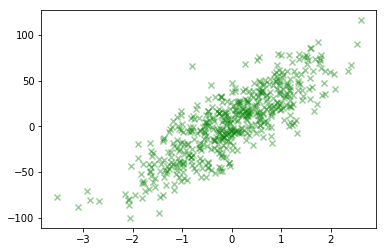

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn.datasets as skd
from sklearn.utils import shuffle

# The noise coefficient is rather large, sometimes it'll generate a very fuzzy set of samples
ds = skd.make_regression(n_samples=500, n_features=1, n_informative=1, n_targets=1, bias=4, noise=20)
plt.scatter(ds[0], ds[1], marker='x', alpha=0.4, color='green')
plt.show()

In [2]:
# Nice, we have a simple noisy-linear dataset. Let's build the regression model! :D
# linear hypothesis: h(X) = w*x.T ~ y

def gradient_descent(w, J, J_prime, alpha=0.2, epsilon=1e-5):
    old_cost = 0
    current_cost = 1e500
    m = float(w.shape[0])
    cost_history= list()
    
    itr = 0
    while abs(old_cost - current_cost) > epsilon and itr < 50:
        itr += 1
        
        old_cost, current_cost = current_cost, J(w)
        cost_history.append(old_cost)
        
        w -= alpha / m * J_prime(w)
        
    return w, cost_history


def mse_cost(X, Y, h, w, lmbda=0):
    """Vanilla MSE function."""
    
    squared_sum = lambda x: np.sum(np.square(x))
    
    m = float(X.shape[0])
    return 1/(2*m) * (squared_sum(h(X, w) - Y) + lmbda/(2*m) * squared_sum(w))


def mse_linear_prime(X, Y, h, w, lmbda=0):
    """MSE function derivative. Compuetes all derivatives at once using matrix multiplication."""
    m = float(X.shape[0])
    
    scaled_error = 1/m * (h(X, w) - Y)
    lambda_part = lmbda/m * w
    lambda_part[0] = 0                        # bias is not regularized
        
    derivatives = (X.T).dot(scaled_error) + lambda_part

    return derivatives


def fit_linear(X, Y, lmbda=0):

    # m samples, n features
    m, n = X.shape
    
    # adding the 0-th column to X representing the bias
    bias_column = np.ones(m)[:, np.newaxis]
    X = np.concatenate((bias_column, X), axis=1)
        
    # initializing the weights with uniform distribution between [-1, 1)
    w = np.random.uniform(-1, 1, n+1)
    
    # the hypothesis is linear on the parameters (not on the samples)
    h = lambda x, w: x.dot(w)
    
    # parametrizing cost and error just by the weights
    mse_linear = lambda wp: mse_cost(X, Y, h, wp, lmbda)
    mse_cost_linear = lambda wp: mse_linear_prime(X, Y, h, wp, lmbda)
    
    # minimize cost function et voilá
    w_star, cost_history = gradient_descent(w, mse_linear, mse_cost_linear)
    
    return w_star, cost_history


def estimate(X, w):
    ones = np.ones((X.shape[0], 1))
    X = np.concatenate((ones, X), axis=1)
    return X.dot(w)


def score(X, w, Y):
    Y = Y[:, np.newaxis]
    Y_hat = estimate(X, w)[:,np.newaxis]
    return np.sum((Y_hat - Y) ** 2)

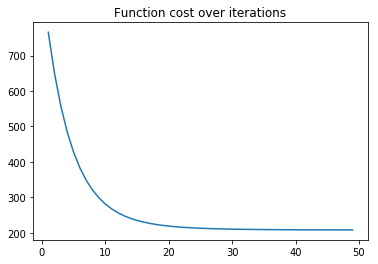

Train cost: 208.066679330192
Test MSE: 96451.13826854728


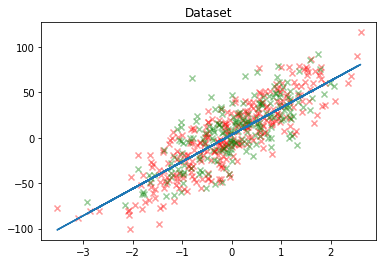

In [4]:
X, Y = shuffle(ds[0], ds[1])

fraction = int(0.6 * len(ds[0]))
X_train = X[:fraction]
Y_train = Y[:fraction]

X_test = X[fraction:]
Y_test = Y[fraction:]

w_star, cost_history = fit_linear(X_train, Y_train, lmbda=30)

plt.plot(range(len(cost_history)), cost_history)
plt.title('Function cost over iterations')
plt.show()

print("Train cost: {}".format(cost_history[-1]))
print("Test MSE: {}".format(score(X_test, w_star, Y_test)))

# Not considering validation set here
plt.scatter(X_train, Y_train, marker='x', alpha=0.4, color='red')
plt.scatter(X_test, Y_test, marker='x', alpha=0.4, color='green')

X_test = np.array(sorted(X_test))
plt.plot(X, estimate(X, w_star))
plt.title('Dataset')
plt.show()

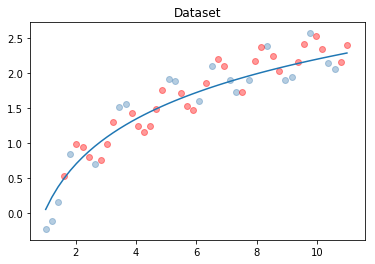

Train cost: 0.03354123160285732
Test MSE: 13.386453976076465


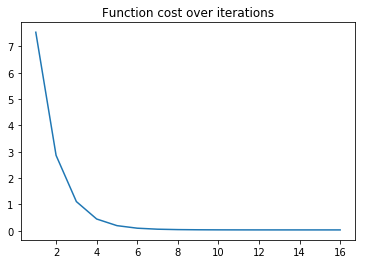

In [5]:
# somehow artificial dataset
X = np.linspace(0, 10, 50) + 1
f = lambda x: np.log(x) + np.sin(4*x)*0.3
Y = f(X)

# generating the dataset matrix
X = X[:, np.newaxis]
ds = np.concatenate([X, Y[:, np.newaxis]], axis=1)
ds = shuffle(ds)

# splitting into train and test. Not considering validation again because this is just for illustration
m = len(X)
fraction = 0.4

X = np.sort(ds[:, 0][:, np.newaxis], axis=0)

X_train = ds[:int(m * fraction), 0][:, np.newaxis]
Y_train = ds[:int(m * fraction), 1]

X_test = ds[int(m * fraction):, 0][:, np.newaxis]
Y_test = ds[int(m * fraction):, 1]

# let's see how our data looks like
plt.title('Dataset')
plt.scatter(X_train, Y_train, color='steelblue', alpha=0.4)
plt.scatter(X_test, Y_test, color='red', alpha=0.4)

# Hypothesis 1: y = a + ln(x)
# Hence, transform the data
X_train = np.log(X_train)
X_test = np.log(X_test)
X_test = np.sort(X_test, axis=0)

# Fit and predict
w_star, cost_history = fit_linear(X_train, Y_train, lmbda=2)
plt.plot(X, estimate(np.log(X), w_star))
plt.show()

# Ensuring that training converged as excepted
print("Train cost: {}".format(cost_history[-1]))
print("Test MSE: {}".format(score(X_test, w_star, Y_test)))

plt.plot(range(len(cost_history)), cost_history)
plt.title('Function cost over iterations')
plt.show()

In [ ]:
# TODO: do regression on the Combined Cycle Power Plant dataset (http://archive.ics.uci.edu/ml/datasets/combined+cycle+power+plant)